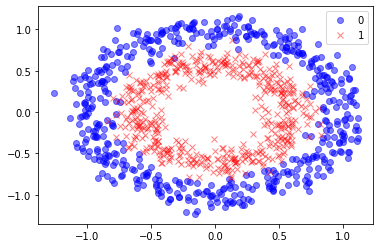

In [3]:
### Jerry Kurata DL with Keras on pluralsight ###

#   Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

# Helper functions

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:
# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation = 'tanh', name = "Hidden_1"))
model.add(Dense(4, activation = 'tanh', name = "Hidden_2"))
model.add(Dense(1, activation = 'sigmoid', name = "Output_Layer"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden_2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.6833 - accuracy: 0.5814
Epoch 2/100
700/700 [==============================] - 0s 91us/step - loss: 0.6375 - accuracy: 0.6729
Epoch 3/100
700/700 [==============================] - 0s 66us/step - loss: 0.6002 - accuracy: 0.6900
Epoch 4/100
700/700 [==============================] - 0s 78us/step - loss: 0.5771 - accuracy: 0.7086
Epoch 5/100
700/700 [==============================] - 0s 71us/step - loss: 0.5758 - accuracy: 0.6914
Epoch 6/100
700/700 [==============================] - 0s 87us/step - loss: 0.5382 - accuracy: 0.7257
Epoch 7/100
700/700 [==============================] - 0s 72us/step - loss: 0.5405 - accuracy: 0.7286
Epoch 8/100
700/700 [==============================] - 0s 74us/step - loss: 0.5136 - accuracy: 0.7457
Epoch 9/100
700/700 [==============================] - 0s 79us/step - loss: 0.5120 - accuracy: 0.7457
Epoch 10/100
700/700 [==============================] - 0s 86us/step - loss: 0.5137

700/700 [==============================] - 0s 71us/step - loss: 0.0991 - accuracy: 0.9614
Epoch 81/100
700/700 [==============================] - 0s 85us/step - loss: 0.0782 - accuracy: 0.9729
Epoch 82/100
700/700 [==============================] - 0s 84us/step - loss: 0.0732 - accuracy: 0.9700
Epoch 83/100
700/700 [==============================] - 0s 80us/step - loss: 0.0825 - accuracy: 0.9743
Epoch 84/100
700/700 [==============================] - 0s 82us/step - loss: 0.0659 - accuracy: 0.9757
Epoch 85/100
700/700 [==============================] - 0s 85us/step - loss: 0.0754 - accuracy: 0.9657
Epoch 86/100
700/700 [==============================] - 0s 86us/step - loss: 0.1179 - accuracy: 0.9543
Epoch 87/100
700/700 [==============================] - 0s 75us/step - loss: 0.0876 - accuracy: 0.9643
Epoch 88/100
700/700 [==============================] - 0s 82us/step - loss: 0.0913 - accuracy: 0.9629
Epoch 89/100
700/700 [==============================] - 0s 82us/step - loss: 0.1058 - 

300/300 [==============================] - 0s 34us/step


Test loss: 0.20126589958866437 Test accuracy: 0.9266666769981384


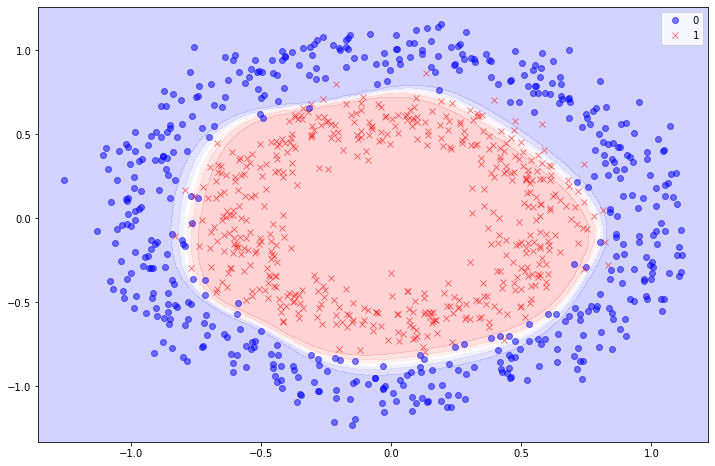

In [19]:
eval_result = model.evaluate(X_test, y_test)

print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()
